In [1]:
#pip install librosa

In [1]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Part 1: Data Loading

In [91]:
# Path to data folders
wav_path = 'data/wav' 
csv_path = 'data/labels'

# Initialize a dictionary to store data
data_dict = {}

# Loop through all files in the WAV folder
for file_name in os.listdir(wav_path):
    if file_name.endswith('.wav'):
        base_name = os.path.splitext(file_name)[0]
        
        # Form corresponding CSV file name
        csv_file_name = f'Label_{base_name.split("_")[-1]}.csv'
        csv_file_path = os.path.join(csv_path, csv_file_name)
        
        if os.path.exists(csv_file_path):
            # Load sleep start times and snoring data from the corresponding CSV file
            data = pd.read_csv(csv_file_path, delimiter=',', header=None, names=['start_time', 'end_time', 'label'])
            
            # Separate sleep start time and snoring data
           
            snoring_data = data.iloc[1:]  # Exclude the sleep start time
            
            # Initialize a list to store rows of snoring and non-snoring data
            data_rows = []
            
            #append the first normal moment: sleeping start time till first snore start time
            sleep_start=data.iloc[0]['start_time']
            first_snore=snoring_data.iloc[0]['start_time']
            first_row={'start_time': sleep_start, 'end_time': first_snore, 'label': 'N'}
            data_rows.append(first_row)
            
            for i in range(len(snoring_data)):
                row = snoring_data.iloc[i]
                start_time = row['start_time']
                end_time = row['end_time']
                label = row['label']
                
                # Convert the Pandas Series to a dictionary
                row_dict = {'start_time': start_time, 'end_time': end_time, 'label': label}
                # Append the current snoring row
                data_rows.append(row_dict)
                
                if i < len(snoring_data) - 1:
                    next_row = snoring_data.iloc[i + 1]
                    next_start_time = next_row['start_time']
                    
                    # Append the non-snoring row
                    if next_start_time > end_time:
                        non_snoring_row = {'start_time': end_time, 'end_time': next_start_time, 'label': 'N'}
                        data_rows.append(non_snoring_row)
            
            # Create a new DataFrame with combined snoring and non-snoring data
            combined_data = pd.DataFrame(data_rows, columns=['start_time', 'end_time', 'label'])

            # Append the combined data to the dictionary
            data_dict[file_name] = combined_data

# Data dictionary now contains WAV file names as keys and corresponding data as values


In [92]:
len(data_dict)

27

In [116]:
#store the dict_data content in csv file for each wav file
csv_output_path = 'data/preprocessed_labels'  # Folder to store CSV files

# Create the output folder if it doesn't exist
if not os.path.exists(csv_output_path):
    os.makedirs(csv_output_path)

# Loop through all WAV files in data_dict
for wav_file, segment_data in data_dict.items():
    # Create a DataFrame from the segment_data
    segment_data_df = pd.DataFrame(segment_data)
    
    # Create a CSV file for each WAV file
    
    # Create a CSV file name in the desired format (e.g., "label_030.csv")
    file_number = wav_file.split('_')[-1].split('.')[0]
    
    output_file_path = os.path.join(csv_output_path, f'label_{file_number}.csv')
    segment_data_df.to_csv(output_file_path, index=False)

In [6]:
list(data_dict.items())[0]

('Video_00_041.wav',
       start_time     end_time label
 0     599.974612   673.847462     N
 1     673.847462   676.856363    S1
 2     676.856363   845.041367     N
 3     845.041367   848.050268    S1
 4     848.050268   861.297789     N
 ..           ...          ...   ...
 811  4415.081000  4418.089901    S1
 812  4418.089901  4427.994199     N
 813  4427.994199  4430.982204    S1
 814  4430.982204  4446.110287     N
 815  4446.110287  4449.119188    S1
 
 [816 rows x 3 columns])

## Part 2: Resample the wav files

In [6]:
#pip install scipy

In [7]:
import os
import librosa
import soundfile as sf

resampled_wav_path = 'data/resampled_wav'  # New folder for resampled WAV files

# Create the 'resampled_wav' folder if it doesn't exist
if not os.path.exists(resampled_wav_path):
    os.makedirs(resampled_wav_path)

# New sample rate for resampling
new_sr = 16000  # Adjust to your desired sample rate

# Initialize a new dictionary to store resampled data
resampled_data_dict = {}

# Loop through the original data dictionary
for wav_file, data in data_dict.items():
    # Load the original audio file using librosa
    wav_file_path = os.path.join(wav_path, wav_file)
    original_x, original_sr = librosa.load(wav_file_path, sr=None)
    
    # Resample the audio data using librosa
    resampled_audio = librosa.resample(original_x, original_sr, new_sr)
    # Save the resampled audio to a new WAV file
    resampled_wav_file_path = os.path.join(resampled_wav_path, wav_file)
    sf.write(resampled_wav_file_path, resampled_audio, new_sr)

/var/folders/p5/f81p_96n1q79t5rqzpvktr_00000gn/T/ipykernel_88356/3161809428.py:24: FutureWarning: Pass orig_sr=8000, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  resampled_audio = librosa.resample(original_x, original_sr, new_sr)
/var/folders/p5/f81p_96n1q79t5rqzpvktr_00000gn/T/ipykernel_88356/3161809428.py:24: FutureWarning: Pass orig_sr=8000, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  resampled_audio = librosa.resample(original_x, original_sr, new_sr)
/var/folders/p5/f81p_96n1q79t5rqzpvktr_00000gn/T/ipykernel_88356/3161809428.py:24: FutureWarning: Pass orig_sr=44100, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  resampled_audio = librosa.resample(original_x, original_sr, new_sr)


In [8]:
original_sr

8000

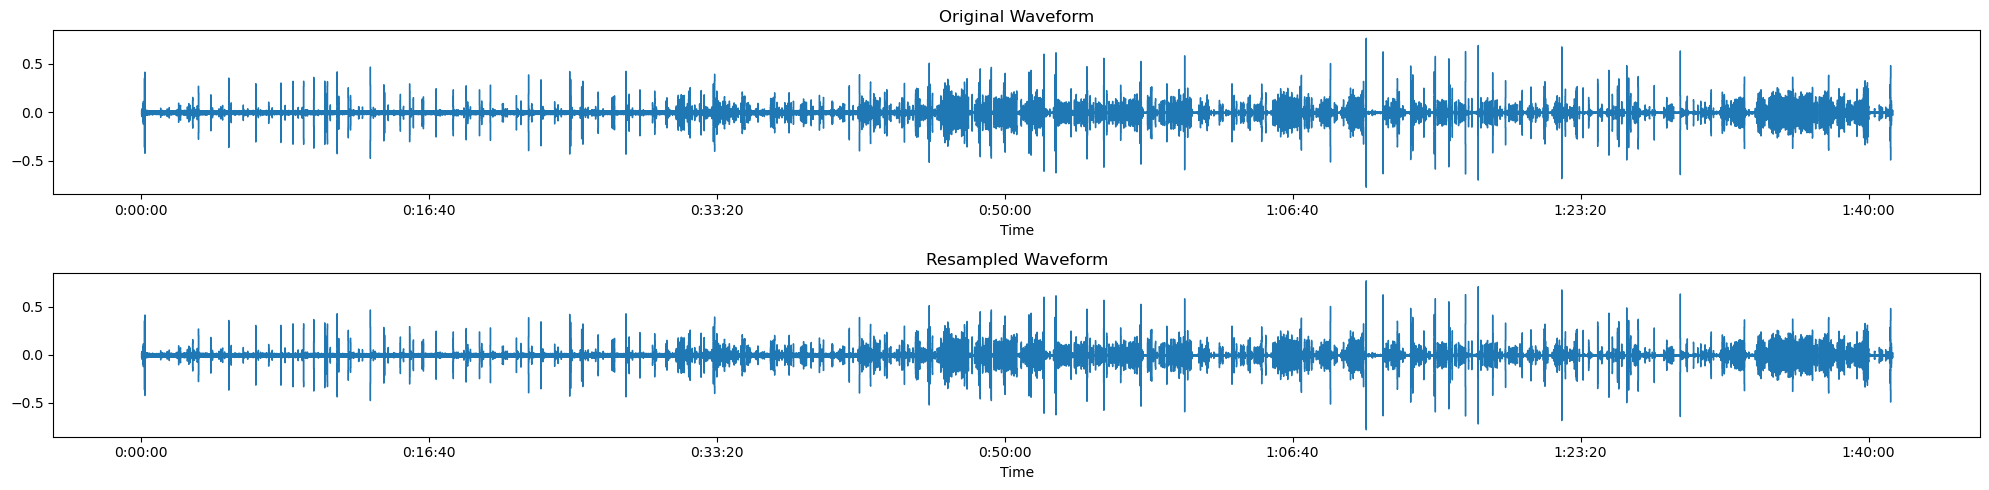

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the original and resampled audio files
original_x, original_sr = librosa.load('data/wav1/Video_00_050.wav', sr=None)
resampled_x, resampled_sr = librosa.load('data/resampled_wav/Video_00_050.wav', sr=None)

# Plot the waveform of the original and resampled audio
plt.figure(figsize=(20, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(original_x, sr=original_sr)
plt.title('Original Waveform')
plt.subplot(2, 1, 2)
librosa.display.waveshow(resampled_x, sr=resampled_sr)
plt.title('Resampled Waveform')
plt.tight_layout()
plt.show()

In [10]:
original_sr

8000

In [11]:
resampled_sr

16000

In [12]:
resampled_x

array([-3.0517578e-05,  0.0000000e+00,  0.0000000e+00, ...,
        3.5400391e-03,  3.0517578e-03,  1.5869141e-03], dtype=float32)

In [13]:
original_x

array([0.        , 0.        , 0.        , ..., 0.00216675, 0.00292969,
       0.00320435], dtype=float32)

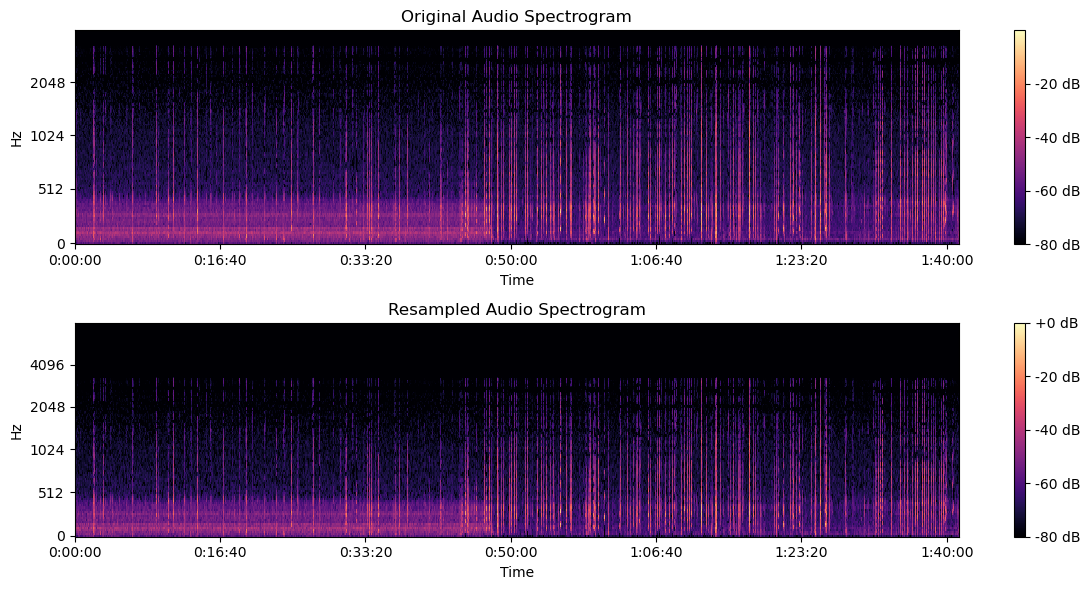

In [8]:
# Compute the spectrogram for the original audio
original_spectrogram = librosa.feature.melspectrogram(y=original_x, sr=original_sr)

# Compute the spectrogram for the resampled audio
resampled_spectrogram = librosa.feature.melspectrogram(y=resampled_x, sr=resampled_sr)

# Plot the spectrograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.power_to_db(original_spectrogram, ref=np.max),
                         y_axis='mel', x_axis='time', sr=original_sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(resampled_spectrogram, ref=np.max),
                         y_axis='mel', x_axis='time', sr=resampled_sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Resampled Audio Spectrogram')

plt.tight_layout()
plt.show()

## Part 3: Data Augmentation

## Part 4: MFCC Extraction

In [107]:
# Path to data folders
wav_path = 'data/resampled_wav' 
mfcc_features_folder = 'data/mfcc_features_csv'  # Change this to the folder where you want to save CSV files

window_size = 0.05  # 100 milliseconds
overlap = 0.5  # 50% overlap
# Initialize a list to store all rows of MFCCs and label information
all_mfcc_data = []

if not os.path.exists(mfcc_features_folder):
    os.makedirs(mfcc_features_folder)

# Loop through all files in the WAV folder
for wav_file, segment_data in data_dict.items():
    
    current_mfcc_data = []
    
    for i in range(len(segment_data)):
        row = segment_data.iloc[i]
        start_time = row['start_time']
        end_time = row['end_time']
        label = row['label']
        
        # Load the audio segment
        wav_file_path = os.path.join(wav_path, wav_file)
        audio_data, sr = librosa.load(wav_file_path, sr=None, offset=start_time, duration=end_time - start_time) 
        
        n_fft = int(window_size * sr)  # Set n_fft based on window size
        if n_fft>len(audio_data):
            n_fft=len(audio_data)
        
        hop_length = int(n_fft * (1 - overlap))  # Calculate hop length based on overlap
        # Compute MFCCs for the windowed audio
        mfccs = librosa.feature.mfcc(y=audio_data,
                                     sr=sr,
                                     n_mfcc=13,  # Number of MFCC coefficients
                                     n_fft=n_fft,
                                     hop_length=hop_length
                                    )
        # Append the MFCCs along with label and time information
        mfcc_row = {
            'mfcc': mfccs.tolist(),
            'label': label,
            'start_time': start_time,
            'end_time': end_time
        }
        all_mfcc_data.append(mfcc_row)
        current_mfcc_data.append(mfcc_row)
        
    # Create a new DataFrame with MFCCs and label information
    
    current_mfcc = pd.DataFrame(current_mfcc_data, columns=['mfcc', 'label', 'start_time', 'end_time'])
    output_file_path = os.path.join(mfcc_features_folder, f'{os.path.splitext(wav_file)[0]}_mfcc.xlsx')
    current_mfcc.to_excel(output_file_path, index=False)

all_mfcc= pd.DataFrame(all_mfcc_data, columns=['mfcc', 'label', 'start_time', 'end_time'])
all_output_file_path = os.path.join(mfcc_features_folder, f'all_mfcc.xlsx')
all_mfcc.to_excel(all_output_file_path, index=False)


/Users/ddcbhutan/miniconda3/lib/python3.10/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/Users/ddcbhutan/miniconda3/lib/python3.10/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


In [108]:
len(combined_mfcc_data)

38398

In [109]:
first_segment=combined_mfcc_data.iloc[0]
first_segment

mfcc          [[-684.6166381835938, -665.8037109375, -665.89...
label                                                         N
start_time                                           360.009025
end_time                                            1004.479277
Name: 0, dtype: object

In [110]:
len(first_segment['mfcc'])

13

In [111]:
len(first_segment['mfcc'][0])

25779

In [112]:
len(first_segment['mfcc'][1])

25779

## Part 5: Extracting Mel_Spectrogram

In [87]:
#pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 297.7 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [115]:
# Path to data folders
wav_path = 'data/resampled_wav' 
mel_features_folder = 'data/mel_features_csv'  # Change this to the folder where you want to save CSV files

window_size = 0.05  # 100 milliseconds
overlap = 0.5  # 50% overlap
# Initialize a list to store all rows of MFCCs and label information
all_mel_data = []

if not os.path.exists(mel_features_folder):
    os.makedirs(mel_features_folder)

# Loop through all files in the WAV folder
for wav_file, segment_data in data_dict.items():
    
    current_mel_data = []
    
    for i in range(len(segment_data)):
        row = segment_data.iloc[i]
        start_time = row['start_time']
        end_time = row['end_time']
        label = row['label']
        
        # Load the audio segment
        wav_file_path = os.path.join(wav_path, wav_file)
        audio_data, sr = librosa.load(wav_file_path, sr=None, offset=start_time, duration=end_time - start_time) 
        
        n_fft = int(window_size * sr)  # Set n_fft based on window size
        if n_fft>len(audio_data):
            n_fft=len(audio_data)
        
        hop_length = int(n_fft * (1 - overlap))  # Calculate hop length based on overlap
        # Compute mel_feature for the windowed audio
        mel_spectrogram = librosa.feature.melspectrogram(y=audio_data,
                                                         sr=sr,
                                                         n_fft=n_fft,
                                                         hop_length=hop_length
                                                         )
        
        mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
        # Append the MFCCs along with label and time information
        mel_row = {
            'mel_spectrogram': mel_spectrogram.tolist(),
            'label': label,
            'start_time': start_time,
            'end_time': end_time
        }
        all_mel_data.append(mel_row)
        current_mel_data.append(mel_row)
        
    # Create a new DataFrame with mel_spectrum and label information
    
    current_mel = pd.DataFrame(current_mel_data, columns=['mel_spectrogram', 'label', 'start_time', 'end_time'])
    output_file_path = os.path.join(mel_features_folder, f'{os.path.splitext(wav_file)[0]}_mel.xlsx')
    current_mel.to_excel(output_file_path, index=False)

all_mel= pd.DataFrame(all_mel_data, columns=['mel_spectrogram', 'label', 'start_time', 'end_time'])
all_output_file_path = os.path.join(mel_features_folder, f'all_mel.xlsx')
all_mel.to_excel(all_output_file_path, index=False)


KeyboardInterrupt: 

In [106]:
len(combined_mel_feature_data)

4124

In [103]:
first_segment=combined_mel_feature_data.iloc[0]

In [104]:
len(first_segment['mel_spectrogram'])

128

In [105]:
len(first_segment['mel_spectrogram'][0])

686